<H2>Content </H2>


<ol>
    <B>
<li>INTRODUCTION</li>
<li>DATA EXPLORATION</li>
<li>EXPLORATORY DATA ANALYSIS</li>
<li>MODELLING</li>
<li>MODEL SELECTION AND ESEMBLE </li>
<li>        PREDICTION </li>
<li>SUMMARY</li>
        </B>
</ol>

<h2> 1. INTRODUCTION </h2>

The intro, and business problems is already given in the Read me. check it out. 

<h2>First step is to import the necessary Libraries</h2>

<h4>Some important libraries :</h4>
<h4>visualize :</h4>
<ol>
<li>Matplotlib</li>
<li>Seaborn</li>
<li>Missingno</li>
</ol>

<h4>manipulate :</h4>
<ol>
<li>Pandas</li>
<li>Numpy</li>
</ol>

<h4>Modeling :</h4>
<ol>
<li>Keras</li>
<li>Tensorflow</li>
<li>Sklearn</li>
</ol>


<h4>algorithms :</h4>
<ol>
<li>XGBRegressor</li>
<li>DecisionTreeRegressor</li>
<li>GradientBoostingRegressor</li>
<li>RandomForestRegressor</li>
<li>LinearSVR</li>
<li>Logistics Regressor</li>
</ol>

<h4>other :</h4>
<ol>
<li>warnings</li>
<li>IPython</li>
<li>Time</li>
</ol>



In [375]:
import pandas as pd
import numpy as np
from scipy                      import stats

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('bmh')


from sklearn.model_selection    import train_test_split
from sklearn.neighbors          import KNeighborsRegressor
from sklearn.ensemble           import RandomForestRegressor
from sklearn.metrics            import mean_squared_error
from sklearn.preprocessing      import StandardScaler
from kneed                      import KneeLocator
from sklearn.cluster            import KMeans
from sklearn.linear_model       import LogisticRegression
from sklearn.model_selection    import KFold, StratifiedKFold
from sklearn.model_selection    import cross_val_score
from sklearn.model_selection    import train_test_split
from sklearn.model_selection    import RandomizedSearchCV
from sklearn.model_selection    import GridSearchCV
from sklearn.preprocessing      import LabelEncoder
from sklearn.linear_model       import LinearRegression
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor
from sklearn.ensemble           import GradientBoostingRegressor
from xgboost                    import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
#from dask_searchcv import RandomizedSearchCV



from tensorflow.keras           import Sequential
from tensorflow.keras.layers    import Dense, BatchNormalization, LeakyReLU
import tensorflow as tf

import time
from IPython.display            import Image


import warnings
warnings.filterwarnings('ignore')

<h3>Import the Dataset</h3>
<h4>The dataset consist of two data </h4>

In [376]:
#READ THE DATA 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


<h2> 2. DATA EXPLORATION </h2>
Taking a closer look on the test data, train data and combines data. 

In [377]:
#Visualize the shape of the test, train and combined data
'train',train.shape,train.nunique(),'test',test.shape, test.nunique()

('train',
 (550068, 12),
 User_ID                        5891
 Product_ID                     3631
 Gender                            2
 Age                               7
 Occupation                       21
 City_Category                     3
 Stay_In_Current_City_Years        5
 Marital_Status                    2
 Product_Category_1               20
 Product_Category_2               17
 Product_Category_3               15
 Purchase                      18105
 dtype: int64,
 'test',
 (233599, 11),
 User_ID                       5891
 Product_ID                    3491
 Gender                           2
 Age                              7
 Occupation                      21
 City_Category                    3
 Stay_In_Current_City_Years       5
 Marital_Status                   2
 Product_Category_1              18
 Product_Category_2              17
 Product_Category_3              15
 dtype: int64)

* Some of the  observation above 
    * the Train data is more than twice the test data.
    * The Users are same in the train and test 
    * Products sold in test are 130 fewer than the products in train.
    * the product category in train is 2 less in product category1, but the same in others. 
    
From this information a strategy for feature engineering and cleaning is performed. 

It will be better to combine the train and test data so we don't need to repeat the process twice. we will make a new column (kind) and we will fill it with train & test to separate the data when we finish

<h4>Dependent Variable</h4>
<ol>
<li>Gender- male or female</li>
<li>Age- age category the customer belongs to</li>
<li>Occupation- Occupation of the customer</li>
<li>City_Category-city category the customer resides in</li>
<li>Stay_In_Current_City_Years- no. of years the customer has resided in the current city</li>
<li>User_ID- unique id of the user</li>
<li>Marital_Status- married or unmarried</li>
<li>Product_Category_1- products of category 1</li>
<li>Product_Category_2- products of category 2</li>
<li>Product_Category_3- products of category 3</li>
</ol>

<h4>Target Variable</h4>
Purchase- the purchase ammount in dollars
<h4>Others</h4>
<ol>
<li>User_ID- unique id of the user</li>
<li>Product_ID- unique id of the product</li>
    Kind - As mentiond above (Train or Test)
</ol>

In [378]:
#Create a new column on the test and train data
#combine the test and train using pandas to cocatinate on the column
train['kind'] = 'train'
test['kind'] = 'test'
combine = pd.concat([train,test], axis=0)

#view the head of the data set
print(combine.shape)
combine.columns

(783667, 13)


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'kind'],
      dtype='object')

<h4>Explore the dataset to see the </h4>

In [379]:
combine.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,kind
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train


In [380]:
combine.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,kind
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train


In [381]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  kind                        783667 non-null  object 
dtypes: float64(3),

In [382]:
combine.dtypes[combine.dtypes == 'int64']

User_ID               int64
Occupation            int64
Marital_Status        int64
Product_Category_1    int64
dtype: object

In [383]:
combine.dtypes[combine.dtypes == 'object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
kind                          object
dtype: object

#### Summary
* The Gender should be changed to categorical
* The City category should also be changed to categorical
* Stay in current city years should be treated.
* The Age category will be stated clearly
* Product category is a categorical variable (Missing data should be treated)
* Purchase can be used to determine the price of the goods 

In [384]:
combine['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

<h5>change the required columns of categorical  </h5>

In [385]:
combine['Gender'] = combine['Gender'].astype('category')
combine['City_Category'] = combine['City_Category'].astype('category')
combine['Stay_In_Current_City_Years'] = combine['Stay_In_Current_City_Years'].astype('category')
combine['Product_Category_1'] = combine['Product_Category_1'].astype('category')
combine['Product_Category_2'] = combine['Product_Category_2'].astype('category')
combine['Product_Category_3'] = combine['Product_Category_3'].astype('category')
combine['Age'] = combine['Age'].astype('category')
combine['City_Category'] = combine['City_Category'].astype('category')
combine['Occupation'] = combine['Occupation'].astype('category')
combine['Marital_Status'] = combine['Marital_Status'].astype('category')

In [386]:
combine.dtypes[combine.dtypes == 'category']

Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category_1            category
Product_Category_2            category
Product_Category_3            category
dtype: object

In [387]:
#Find out the number of unique products
combine.loc[(combine['kind']=='train')].Product_ID.nunique(), combine.loc[(combine['kind']=='test')].Product_ID.nunique()

(3631, 3491)

In [388]:
#Find out the number of unique users
combine.loc[(combine['kind']=='train')].User_ID.nunique(),combine.loc[(combine['kind']=='test')].User_ID.nunique()

(5891, 5891)

In [389]:
combine['User_ID'].value_counts()

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1005117      13
1004991      13
1000708      13
1005804      13
1000341      13
Name: User_ID, Length: 5891, dtype: int64

In [390]:
#here we describe the new data set to view all stastical measures
combine.describe()

,User_ID,Purchase
count,7.836670e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727267e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001519e+06,5823.000000
50%,1.003075e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


From the above data the Purchase needs to be observed carefull. 


<h5>Then we want to find out the number of missing values in the data set </h5>

In [391]:
#identify null values
combine.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
kind                               0
dtype: int64

<h5>Visualizing the dataset with missing value library "Missingno"  </h5>
With the aid of this library. the whole data set caan be viewed in a holistic manner. Viewing all the basic data variables, showing misisng and enpty variable set. 

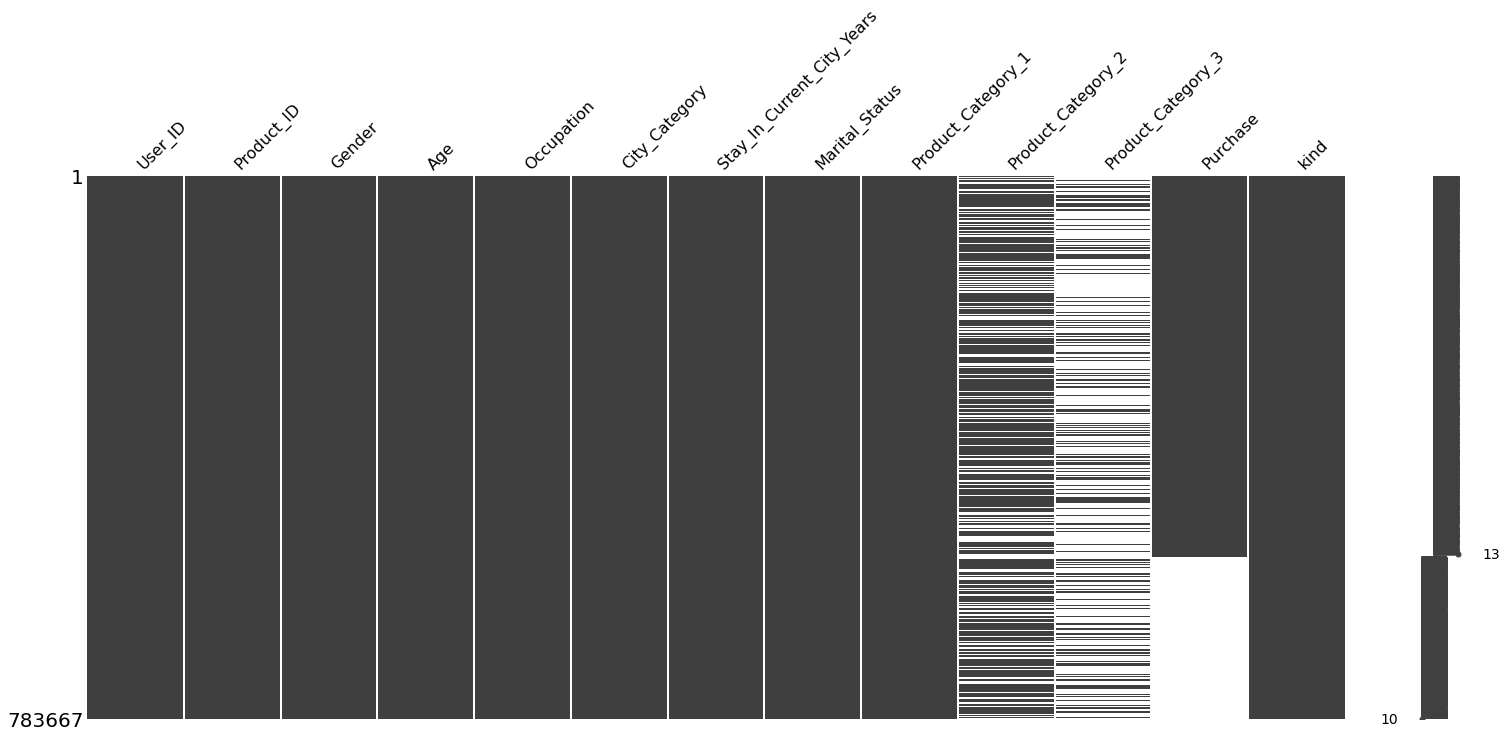

In [392]:
#combine and visualize the missing values
msno.matrix(combine);

In [393]:
#bring back the test and train from the combine just for EDA
train = combine[combine['kind'] == 'train']
test = combine[combine['kind'] == 'test']

<h2>3. EDA</h2>
let's try to see the relation between the labels and the target

<h3> Univarite Analysis Categorical</h3>
The data count in all variables, this will show the total variation among thee data set cleaarly seeing the categorical data set in a graphical (Barchart view)

In [ ]:
cat = ['Gender','City_Category','Marital_Status','Occupation','Product_Category_1','Product_Category_2','Product_Category_3']
numerical = ['Purchase','User_ID']

In [ ]:
def Explore_Cat_Data( data, var_group):
    '''
    This function is aimed to count the number of unique values in a group of categorical variable 
    '''
    
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    for j,i in enumerate(var_group):
        count = data[i].value_counts()
        u_count = data[i].nunique()
        mode = data[i].mode()
        
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
       
        x=norm_count
        y=norm_count.index
        plt.subplot(1,size,j+1)
        sns.barplot(x=x, y=y, order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {}% '.format(n_uni,norm_count*100))
        
        print(i)
        a = len(count)
        #for i in range(0,a):
            #print ('the number of unique in {} is {}'.format((count[:a].index[i]),(count[:a].values[i])))


        

In [ ]:
Explore_Cat_Data(train,cat)

### Summary
* **Gender**
    * The unique value is 2 
    * Males is 75%
    * Females is 25%
* **City Category**
    * From the data Stay in city category 
    * i) A - 27%
    * ii) B - 42%
    * iii) C - 31%
* **Marital Status** 
    * There are two unique marital status
    * 59% - Single 
    * 40% - Married
* **Prouduct Category 1-3**
    * Best selling in category 1 is 5
    * Best selling in category 2 is 8
    * Best selling in category 3 is 16

### Categorical variable Count
You can also view the categorical variables count. 

In [ ]:
#make the prediction and target column 
target = 'Purchase'
cat_col = ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Stay_In_Current_City_Years',
           'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

In [ ]:
#Visualize the data in a barchart
fig, ax = plt.subplots(5,2, figsize=(15,18))
ax.flat[-1].set_visible(False) # to remove last plot
for i,col in enumerate(cat_col):
    plt.subplot(5,2,i+1)
    sns.countplot(x=col, data=train)
    plt.xlabel(col)

In [ ]:
a = (train[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].groupby('Product_Category_1', as_index =True).agg({"Purchase":"sum"}).round(2)).sum() 
b = (train[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].groupby('Product_Category_2', as_index =True).agg({"Purchase":"sum"}).round(2)).sum()
c = (train[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].groupby('Product_Category_3', as_index =True).agg({"Purchase":"sum"}).round(2)).sum()



In [ ]:
a, b, c

### Summary
* **Product category**
    * Product 1 sell more products 
* **City category** 
    * Only people in the city within one year buy more  why?\
* **GenderMen**
    * Shop more in this store
* **main shoppers** 
    * are withing 25- 36 years

<h3>Ploting Unique product by age group and Age group distribution.</h3>
The plot show us the comparation between age group per unique product sold and the age group distribution on the data set. 

In [ ]:
#visualize how age is distributed
prod_byage = train.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax = ax.ravel()

sns.countplot(train['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

<h3>Occupation Distribution  </h3>

In [ ]:
#view occupied Distribution
plt.figure(figsize=(12,6))
sns.countplot(train['Occupation'])
plt.title('Occupation Distribution')
plt.show()

### Summary


### Univariate Numerical

In [ ]:
# custom function for easy and efficient analysis of numerical univariate

def Explore_numeric_Data(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [ ]:
Explore_numeric_Data(train,numerical)

### Summary
* **Purchae**
    *    **Most customers purchase between USD4240.9 to USD14287.03**
    *    skewness 0.6 : Purchase is **negligibly biased towards lower purchased**
    *    **kurtosis = -0.34**; very less likely to have extreme/outlier values.
* **User_ID** 
    * variable is **unique for every customer, Hence uniform** distribution.
    * This variable **does not contribute any information**
    * Can be eliminated from data

### MultiVariate Analysis on  Numerical - Categorical

<h3>Ploting categories by purchase made.</h3>
This shows the Gender categories per purchase made in different city category. A clear view of what happens in different city distribution. the male in city category C. shows a little lead, follow by the Males in city category B. This means that our result will have some significant be impact.


In [ ]:
#gender distribution for different categories
g = sns.FacetGrid(train,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

### Summary
* **City category**
    * In A: The difference between the male and female isn't much
    * In B: The difference is quite significant Male bought more
    * In C: There id significant differnce Also, Male bought the highest

<h3>Purchase against stay in city category.</h3>
This clearly hows the distribution of purchases, according to marital status by their cities. 

In [ ]:
#violine chart for marital status on different city category
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status', data=train)

<h3>Box Plot of Purchases according to their ages.</h3>
The box plot show the purchases by age group. There are outliers ofcourse it can be seen clearly. 

In [ ]:
#box plot to view outliers
sns.boxplot('Age','Purchase', data = train)
plt.show()

### Summary
* **Age**
    * Lot of missing values visible

<h3>Next dive deep into the product categories to find the categories purchase per sub category</h3>

In [ ]:
def find_category(Cat):
    SubCategory = []
    mean_purchase = []

    for i in train[Cat].unique():
        SubCategory.append(i)
    SubCategory.sort()

    for e in SubCategory:
        mean_purchase.append(train[train[Cat]==e]['Purchase'].mean())

    plt.figure(figsize=(10,5))

    sns.barplot(x=SubCategory,y=mean_purchase)
    plt.title('Mean of the Purchases per SubCategory')

    plt.xlabel(Cat, rotation=0)
    plt.ylabel('Mean Purchase')
    plt.show()

In [ ]:
find_category('Product_Category_1') 
find_category('Product_Category_2')
find_category('Product_Category_3')

### Summary
* **Mean Purchase**
  * **Product Category 1**
    - On Average Product 10 peformed better
    - On Average the worst seller is Product 19
  * **Product Category 2**
    - On Average Product 10 peformed better
    - On Average the worst sellers include 7,12 and 14   
  * **Product Category 3**
    - On Average Product 3 peformed better
    - On Average the worst seller is product 12

### MultiVariate Analysis on  Categorical - Categorical

<h3>Marital status against the stay in city.</h3>


In [ ]:
#marrital status for amount of years stayes in city
g = sns.FacetGrid(train,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

<h3>Correlation heat map between the variables  </h3>
This is used to view the correlation between the continous variables. Most of which are non corrolated to each other, the product categories show the most sign of corellation.

In [ ]:
#Check the corrolation of the train data
corrmat = train.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=1.0, square=True)

### Summary
* **Correlation**
-The related data just include the product category. \
The others have little or no correlation

<h2>Feature Engineering</h2>

The Age category, Gender, stay category and the city category are classified accordingly

In [394]:
#Create a new category integer for age and city
age_cat = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
combine['Age'] = combine['Age'].map(age_cat)

stay_age = {'0':0, '1':1, '2':2, '3':3, '4+':4}
combine['Stay_In_Current_City_Years'] = combine['Stay_In_Current_City_Years'].map(stay_age)

city_cat = {'A':1, 'B':2, 'C':3}
combine['City_Category'] = combine['City_Category'].map(city_cat)

gender_cat = {'M':0, 'F':1}
combine['Gender'] = combine['Gender'].map(gender_cat)

In [395]:
#view the type of data in each column
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     783667 non-null  int64   
 1   Product_ID                  783667 non-null  object  
 2   Gender                      783667 non-null  category
 3   Age                         783667 non-null  category
 4   Occupation                  783667 non-null  category
 5   City_Category               783667 non-null  category
 6   Stay_In_Current_City_Years  783667 non-null  category
 7   Marital_Status              783667 non-null  category
 8   Product_Category_1          783667 non-null  category
 9   Product_Category_2          537685 non-null  category
 10  Product_Category_3          237858 non-null  category
 11  Purchase                    550068 non-null  float64 
 12  kind                        783667 non-null  object  
dtyp

<h3>Create some more variable </h3>

<h4>Price</h4>
Although this variable isn't given, it is clear it has impact on the prediction. the price is gotten from the minimum purchase value of a particular Product_ID. Assuming that is the price. 
Dictionary of product IDs with minimum purchase

In [396]:
prod_prices = combine.groupby('Product_ID').min()['Purchase'].to_dict()

In [397]:
# Find price from the minimun of price of all category
def find_price(row):
    prod = row['Product_ID']
    return prod_prices[prod]

combine['Price'] = combine.apply(find_price,axis=1)

<h3>Bachelor/Spintser</h3>
This variable is derived form the single marital status at a particular age group. 

In [398]:
combine['Bachelor']=((combine.Age == 2) & (combine.Marital_Status == 0) & (combine.Gender == 1)).astype(int)
combine['Spintser']=((combine.Age == 2) & (combine.Marital_Status == 0) & (combine.Gender == 0)).astype(int)

<h3>Dependent/working/retired </h3>
This variable is derived form the age and marital status at a age group 1, 2-5 and 6. 

In [399]:
combine['Dependent']=((combine.Age == 0)).astype(int)
combine['Employed']=((combine.Age == 2) | (combine.Age == 3) | (combine.Age == 4) | (combine.Age == 5)).astype(int)
combine['Working']=((combine.Age == 2) | (combine.Age == 3) | (combine.Age == 4) | (combine.Age == 5) & ((combine.Occupation != 10)|(combine.Occupation != 16))).astype(int)
combine['Retired']= ((combine.Age == 6) ).astype(int)

### Using Missing Values
Here i will just add two columns to specify the row that got missing value, so 1 if the row is missing and 0 if not
and i will use them as a features

In [400]:
#combine['Product_Category_3'].fillna(value='missing')
#combine['Product_Category_3'].isnull()
combine['Product_Category_3'] = (combine['Product_Category_3'].isnull()).astype('int')
#combine['Product_Category_2'] = (combine['Product_Category_2'].isnull()).astype('int')
#combine['Product_Category_3'] = (combine['Product_Category_3'].isnull()).astype('int')
#combine['Product_Category_3']

In [401]:
#create misisng value column to identify which have misisng values
#using backfill method for the missing values 
data = combine
data['miss_1'] = [1 if x!=x else 0 for x in combine['Product_Category_1']]
data['miss_2'] = [1 if x!=x else 0 for x in combine['Product_Category_2']]
data['miss_3'] = [1 if x!=x else 0 for x in combine['Product_Category_3']]
data['promo'] =  [1 if x!=x else 0 for x in combine['Price']]

In [402]:
combine['Price'] = combine['Price'].fillna(value =0)

In [403]:
combine['Mean_Price'] = combine.groupby('User_ID')['Price'].mean()

In [404]:
a =combine.groupby('User_ID')['Price'].mean().reset_index()
a.columns = ['User_ID','Mean_Price']

In [405]:
combine['Mean_Price'] = combine.loc[:,'User_ID'].map(a.set_index('User_ID')['Mean_Price']).round(2)

In [406]:
combine[['User_ID','Price','Mean_Price']]

,User_ID,Price,Mean_Price
0,1000001,2648.0,2356.89
1,1000001,3880.0,2356.89
2,1000001,343.0,2356.89
3,1000001,365.0,2356.89
4,1000002,3920.0,3028.56
...,...,...,...
233594,1006036,2058.0,2756.15
233595,1006036,1795.0,2756.15
233596,1006036,3795.0,2756.15
233597,1006037,5016.0,2756.69


### Create Price Clusters

In [407]:
def cluster(df,column):
    coords = np.vstack((df[column].values))

    sample_ind = np.random.permutation(len(coords))[:500000]

    #first scale data then find the optimal scale using bseline model kmeans
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(coords[sample_ind])
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

    ### A list holds the SSE values for each k
    sse = []
    for k in range(1, 50):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)
    
    #rather than eyeballing lets use the Knee locator to find the optimal clusters.
    kl = KneeLocator(range(1, 50), sse, curve="convex", direction="decreasing")
    
    kmeans = MiniBatchKMeans(n_clusters=kl.elbow, batch_size=10000).fit(coords[sample_ind])
    df.loc[:, ('{}_cluster'.format(column))] = kmeans.predict(df[[column]])

In [409]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [ ]:
copy=combine.copy()

## Create Price cluster 

In [410]:
cluster(combine,'Price')
combine = order_cluster('Price_cluster','Price',combine,True)
combine[['Price_cluster','Price']].loc[(combine['Price_cluster'])==0]

,Price_cluster,Price
339561,0,343.0
339562,0,365.0
339563,0,689.0
339564,0,793.0
339565,0,692.0
...,...,...
377916,0,693.0
377917,0,343.0
377918,0,714.0
377919,0,685.0


## Create Frequency cluster 

In [411]:
#get order counts for each user and create a dataframe with it
frequency = train.groupby('User_ID').Purchase.count().reset_index()
frequency.columns = ['User_ID','Frequency']
combine['Frequency'] = combine.loc[:, 'User_ID'].map(frequency.set_index('User_ID')['Frequency'])

In [412]:
#cluster Frequency
cluster(combine,'Frequency')
combine = order_cluster('Frequency_cluster','Frequency',combine,True)

### Create monetary value cluster

In [413]:
#get sum for each user and create a dataframe with it
monetry = train.groupby('User_ID').Purchase.sum().reset_index()
monetry.columns = ['User_ID','Life_Value']
combine['Life_Value'] = combine.loc[:, 'User_ID'].map(monetry.set_index('User_ID')['Life_Value'])

In [414]:
combine

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Retired,miss_1,miss_2,miss_3,promo,Mean_Price,Price_cluster,Frequency,Frequency_cluster,Life_Value
0,1000001,P00069042,1,0,10,1,2,0,3,NaN,...,0,0,1,0,0,2356.89,2,35,0,334093.0
1,1000006,P0096642,1,5,9,1,1,0,2,3.0,...,0,0,0,0,0,2077.31,2,47,0,379930.0
2,1000021,P00220242,0,1,16,2,0,0,3,12.0,...,0,0,0,0,0,2805.25,2,14,0,127099.0
3,1000027,P00116342,0,2,11,3,1,1,2,NaN,...,0,0,1,0,0,2882.05,2,42,0,448934.0
4,1000031,P00322042,0,6,7,3,2,0,5,8.0,...,1,0,0,0,0,2251.08,2,64,0,496154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1003618,P00088242,0,6,17,1,4,1,6,10.0,...,1,0,0,0,0,2785.14,4,767,4,5962012.0
783663,1002909,P00253342,0,2,7,1,1,0,1,NaN,...,0,0,1,0,0,2878.71,4,718,4,7577756.0
783664,1001181,P00153942,0,3,7,1,3,1,6,16.0,...,0,0,0,0,0,2796.51,4,862,4,6387961.0
783665,1001941,P00255242,0,3,17,1,1,0,1,NaN,...,0,0,1,0,0,2550.63,4,898,4,6817493.0


In [415]:
#cluster motery value
cluster(combine,'Life_Value')

In [416]:
combine = order_cluster('Life_Value_cluster','Life_Value',combine,True)

In [417]:
#calculate overall score and use mean() to see details
combine['Customer_Score'] = combine['Frequency_cluster'] + combine['Life_Value_cluster']

In [418]:
combine.groupby('Customer_Score')['Frequency','Life_Value'].mean()

,Frequency,Life_Value
Customer_Score,,
0,52.651821,4.898357e+05
1,97.723382,1.025067e+06
2,157.285969,1.419781e+06
3,212.067668,2.055919e+06
4,293.550862,2.555386e+06
5,375.318281,3.351651e+06
6,476.028888,4.092164e+06
7,657.322862,5.331048e+06
8,769.617130,6.658517e+06


We can use the above to score the customers based on the custmer score 0 is worst and x is best 

To keep things simple, better we name these scores:

0 to 1: verylow Value
2 to 3: low value
4 to 6: Mid Value
7+: High Value


In [419]:
combine['Segment'] = '1'
combine.loc[combine['Customer_Score']>1,'Segment'] = '2' 
combine.loc[combine['Customer_Score']>3,'Segment'] = '3' 
combine.loc[combine['Customer_Score']>6,'Segment'] = '3' 

In [420]:
combine

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,miss_3,promo,Mean_Price,Price_cluster,Frequency,Frequency_cluster,Life_Value,Life_Value_cluster,Customer_Score,Segment
0,1000001,P00069042,1,0,10,1,2,0,3,NaN,...,0,0,2356.89,2,35,0,334093.0,0,0,1
1,1000006,P0096642,1,5,9,1,1,0,2,3.0,...,0,0,2077.31,2,47,0,379930.0,0,0,1
2,1000021,P00220242,0,1,16,2,0,0,3,12.0,...,0,0,2805.25,2,14,0,127099.0,0,0,1
3,1000027,P00116342,0,2,11,3,1,1,2,NaN,...,0,0,2882.05,2,42,0,448934.0,0,0,1
4,1000031,P00322042,0,6,7,3,2,0,5,8.0,...,0,0,2251.08,2,64,0,496154.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1003618,P00088242,0,6,17,1,4,1,6,10.0,...,0,0,2785.14,4,767,4,5962012.0,4,8,3
783663,1002909,P00253342,0,2,7,1,1,0,1,NaN,...,0,0,2878.71,4,718,4,7577756.0,4,8,3
783664,1001181,P00153942,0,3,7,1,3,1,6,16.0,...,0,0,2796.51,4,862,4,6387961.0,4,8,3
783665,1001941,P00255242,0,3,17,1,1,0,1,NaN,...,0,0,2550.63,4,898,4,6817493.0,4,8,3


<h3>View the missing data</h3>
View the data one more time to make sure all is in order. 

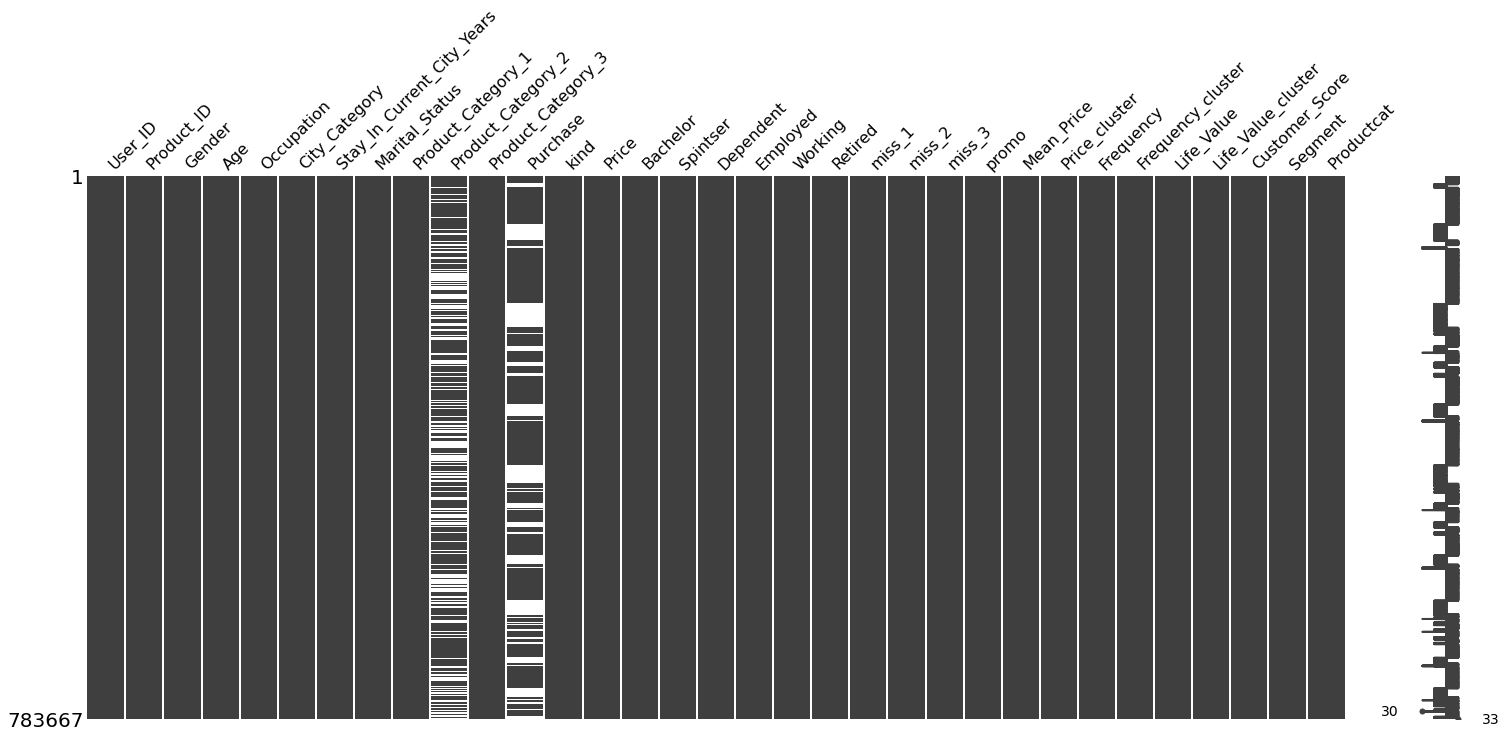

In [471]:
msno.matrix(combine);

In [422]:
combine['User_ID'] = combine['User_ID'] - 1000000
combine['Product_ID'] = combine['Product_ID'].apply(lambda x:  ('P00'+ x))

#enc = LabelEncoder()
train['User_ID'] = enc.fit_transform(train['User_ID'])
test['User_ID'] = enc.transform(test['User_ID'])

combine['Product_ID'] = combine['Product_ID'].str.replace('P00', '')


#scaler = StandardScaler()
#train['Product_ID'] = scaler.fit_transform(train['Product_ID'].values.reshape(-1, 1))
#test['Product_ID'] = scaler.transform(test['Product_ID'].values.reshape(-1, 1))

<h3> Separate the data</h3>

In [424]:
train = combine[combine['kind'] == 'train']
test = combine[combine['kind'] == 'test']

train.drop(['kind'], axis=1, inplace=True)
test.drop(['kind','Purchase'], axis=1, inplace=True)

### Outlier Analysis

Check and Remove outlier from the data 
After creating the last variable price, it is then advised to remove the outlier form the this variable. 

In [425]:
#identify outliers with standard deviation
from numpy import mean
from numpy import std
# seed the random number generator
d =train['Price']
# calculate summary statistics
data_mean, data_std = mean(d), std(d)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in d if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in d if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 5105
Non-outlier observations: 544963


In [426]:
#locate the outlier in the data set
d.loc[outliers] = np.nan 
train.isnull().sum()

KeyError: '[16144.0, 15636.0, 12437.0, 12186.0, 12316.0, 14498.0, 12323.0, 12197.0, 12715.0, 13868.0, 12461.0, 12466.0, 14773.0, 12729.0, 16954.0, 16445.0, 12222.0, 15737.0, 12363.0, 13260.0, 12237.0, 14414.0, 16846.0, 12368.0, 16338.0, 12884.0, 12245.0, 13916.0, 15836.0, 15966.0, 12895.0, 15200.0, 16609.0, 12253.0, 12391.0, 17000.0, 12263.0, 12395.0, 12653.0, 12398.0, 15224.0, 13945.0, 16895.0] not in index'

<AxesSubplot:>

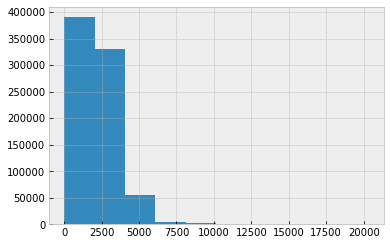

In [314]:
(combine['Price']).hist()

<AxesSubplot:>

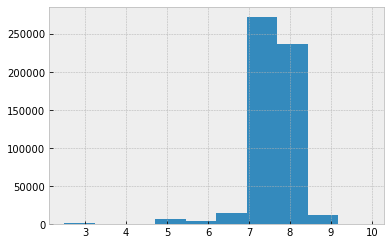

In [315]:
(np.log(train['Price'])).hist()

In [478]:
#view the type of data in each column
((train.isnull().sum()/train.shape[0])*100).sort_values(ascending = False)

Product_Category_2            31.566643
User_ID                        0.000000
Employed                       0.000000
Customer_Score                 0.000000
Life_Value_cluster             0.000000
Life_Value                     0.000000
Frequency_cluster              0.000000
Frequency                      0.000000
Price_cluster                  0.000000
Mean_Price                     0.000000
promo                          0.000000
miss_3                         0.000000
miss_2                         0.000000
miss_1                         0.000000
Retired                        0.000000
Working                        0.000000
Dependent                      0.000000
Product_ID                     0.000000
Spintser                       0.000000
Bachelor                       0.000000
Price                          0.000000
Purchase                       0.000000
Product_Category_3             0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000


In [437]:
#combine['Price'] = combine['Price'].interpolate(method='nearest')
#combine['Product_Category_2'] = combine['Product_Category_2'].interpolate(method='bfill')
#meanvaltr = train['Price'].mean()
#meanvalts = test['Price'].mean()
train['Price'] = train['Price'].fillna(value =0)
test['Price'] = test['Price'].fillna(value =0)

In [463]:
combine['Productcat'] = combine.loc[:, 'Product_ID'].map(a.set_index('Product_ID')['Product_Category_3'])

In [455]:
train['Product_ID'].nunique()

3631

In [479]:
modvaltr = train['Product_Category_2'].mode()[0]
modvalts = test['Product_Category_2'].mode()[0]
#train['Product_Category_2']=train['Product_Category_2'].astype('str')
train['Product_Category_2'] = train['Product_Category_2'].fillna(value = modvaltr)
train['Product_Category_2']=train['Product_Category_2'].astype('category')
#test['Product_Category_2']=test['Product_Category_2'].astype('str')
test['Product_Category_2'] = test['Product_Category_2'].fillna(value =modvalts)
test['Product_Category_2']=test['Product_Category_2'].astype('category')


As seen from the figure above the only misisng data is the purchase that will be predicted. the data is cleaned and ready to be modelled.
We seperate the data once more then we are ready to creat our model. 

Remove the outliers

In [480]:
#remove totally and view
#train.dropna(subset=['Price'],inplace=True)
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Price                         0
Bachelor                      0
Spintser                      0
Dependent                     0
Employed                      0
Working                       0
Retired                       0
miss_1                        0
miss_2                        0
miss_3                        0
promo                         0
Mean_Price                    0
Price_cluster                 0
Frequency                     0
Frequency_cluster             0
Life_Value                    0
Life_Value_cluster            0
Customer_Score                0
Segment                       0
dtype: i

<h2>4.MODELLING</h2>

In [321]:
train['Age'] = pd.to_numeric(train['Age'])

In [481]:
#Dividing the data into test and train datasets
#drop purchase 
target = ['Purchase']
features = train.columns.drop(target)


In [482]:
features

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Price', 'Bachelor',
       'Spintser', 'Dependent', 'Employed', 'Working', 'Retired', 'miss_1',
       'miss_2', 'miss_3', 'promo', 'Mean_Price', 'Price_cluster', 'Frequency',
       'Frequency_cluster', 'Life_Value', 'Life_Value_cluster',
       'Customer_Score', 'Segment'],
      dtype='object')

In [483]:
train[features]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,miss_3,promo,Mean_Price,Price_cluster,Frequency,Frequency_cluster,Life_Value,Life_Value_cluster,Customer_Score,Segment
0,1,069042,1,0,10,1,2,0,3,8.0,...,0,0,2356.89,2,35,0,334093.0,0,0,1
1,6,96642,1,5,9,1,1,0,2,3.0,...,0,0,2077.31,2,47,0,379930.0,0,0,1
2,21,220242,0,1,16,2,0,0,3,12.0,...,0,0,2805.25,2,14,0,127099.0,0,0,1
3,27,116342,0,2,11,3,1,1,2,8.0,...,0,0,2882.05,2,42,0,448934.0,0,0,1
4,31,322042,0,6,7,3,2,0,5,8.0,...,0,0,2251.08,2,64,0,496154.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783554,1980,261542,0,3,7,1,1,0,16,8.0,...,0,0,2458.33,4,685,4,5549865.0,4,8,3
783555,3841,081442,0,4,18,1,4,0,6,8.0,...,0,0,2784.86,4,698,4,6044415.0,4,8,3
783556,4277,014442,0,3,16,1,0,0,6,8.0,...,0,0,2976.80,4,979,4,10536909.0,4,8,3
783557,4277,161042,0,3,16,1,0,0,14,16.0,...,0,0,2976.80,4,979,4,10536909.0,4,8,3


In [484]:

#scaler = StandardScaler()

#train[features] = scaler.fit_transform(train[features])


X = train[features].values
Y = train[target].values
# Create the bins.  My `y` variable has
# 550068 observations, and I want 50 bins.

bins = np.linspace(0, 500000, 50)

# Save your Y values in a new numpy array,
# broken down by the bins created above.
x_bin = np.digitize(X[:,11], bins)

# Pass y_binned to the stratify argument,
# and sklearn will handle the rest

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=x_bin)

In [326]:
del data
del copy
#del combine
del d
del train
del kmeans

In [327]:
model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.03836
Feature: 1, Score: 0.06032
Feature: 2, Score: 0.00377
Feature: 3, Score: 0.01075
Feature: 4, Score: 0.02126
Feature: 5, Score: 0.00671
Feature: 6, Score: 0.01269
Feature: 7, Score: 0.00416
Feature: 8, Score: 0.03090
Feature: 9, Score: 0.01716
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.60286
Feature: 12, Score: 0.00146
Feature: 13, Score: 0.00311
Feature: 14, Score: 0.00074
Feature: 15, Score: 0.00169
Feature: 16, Score: 0.00167
Feature: 17, Score: 0.00055
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00185
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00014
Feature: 23, Score: 0.00030
Feature: 24, Score: 0.04161
Feature: 25, Score: 0.00108
Feature: 26, Score: 0.04364
Feature: 27, Score: 0.04958
Feature: 28, Score: 0.00102
Feature: 29, Score: 0.00174
Feature: 30, Score: 0.00060
Feature: 31, Score: 0.04027


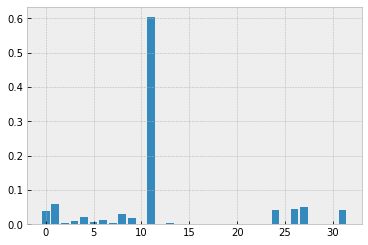

In [328]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<h3>Decision Trees</h3>

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values. 
Decision tree builds models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated 
decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches 
(e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. 
The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 
Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 
If the maximum depth of the tree is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

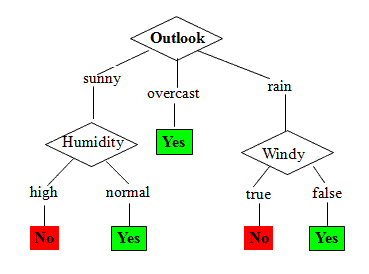

<h3>DRegresssion</h3>

Regression is to examine two things: (1) does a set of predictor variables do a good job of predicting an outcome (dependent) variable? (2) Which variables, 
in particular, are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the 
outcome variable? These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score,
c = constant, b = regression coefficient, and x = score on the independent variable.


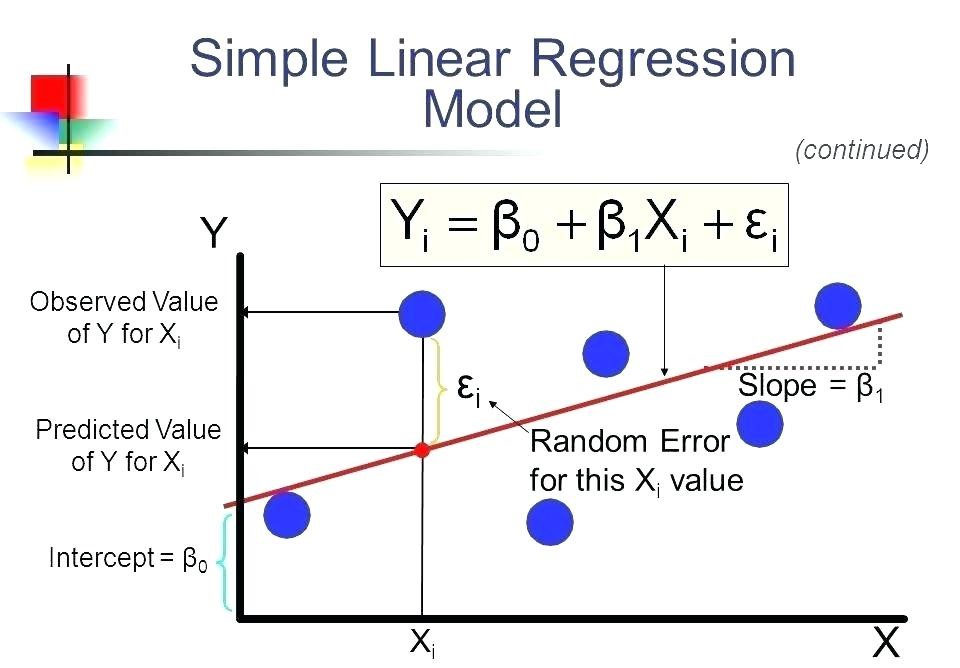

<h3>Ramdom forest</h3>

A random forest is an estimator that fits a number of classifying decision trees on various sub-samples of the dataset 
and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True. The idea behind this technique is to decorrelate the several trees. It generates on the different bootstrapped samples(i.e. self-generated samples) from training Data. And then we reduce the Variance in the Trees by averaging them. Hence, in this approach, it creates a large number of decision trees in python or R.The random forest model is very good at handling tabular data with numerical features, or categorical features with fewer than hundreds of categories. 
Random forests have the ability to capture the non-linear interaction between the features and the target.
Note:-Tree based models are not designed to work with very sparse features. When dealing with sparse input data, we can either pre-process the sparse features to generate numerical statistics or switch to a linear model, which is better suited for such scenarios.

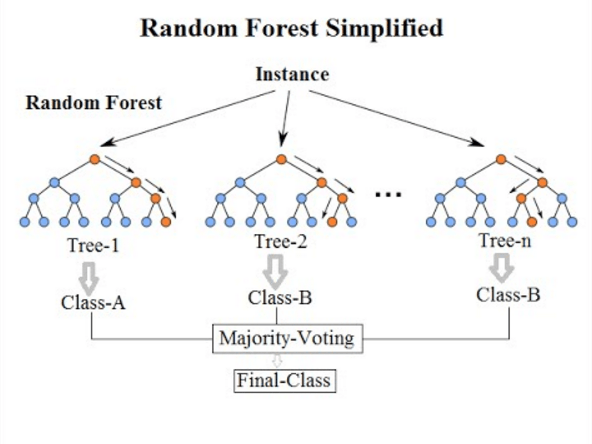

<h3>Gradient Boosting</h3>

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of 
weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing 
optimization of an arbitrary differentiable loss function. Boosting can be interpreted as an optimization algorithm on a suitable cost function. The latter two papers 
introduced the view of boosting algorithms as iterative functional gradient descent algorithms. That is, algorithms that optimize a cost function over function space 
by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. This functional gradient view of boosting has led to the 
development of boosting algorithms in many areas of machine learning and statistics beyond regression and classification.gradient boosting combines weak "learners" 
into a single strong learner in an iterative fashion. It is easiest to explain in the least-squares regression setting, where the goal is to "teach" a model F to 
predict values of the form y ^ = F ( x ) by minimizing the mean squared error.


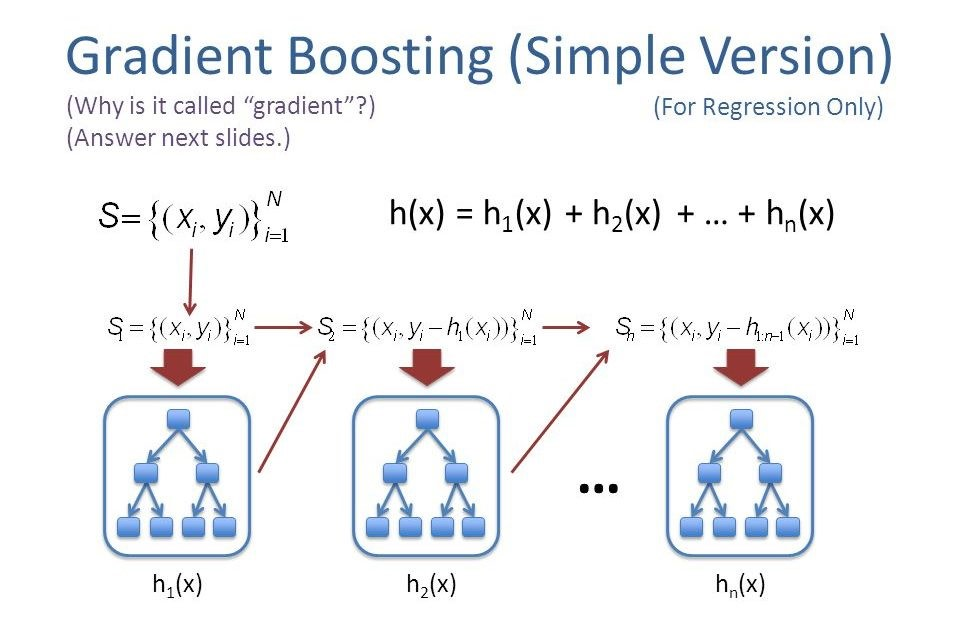

<h3> Assigning the variables </h3>
Next we will assign the functions to variables to be called later

In [485]:
lr    = LinearRegression()
dtr   = DecisionTreeRegressor()
rfr   = RandomForestRegressor()
gbr   = GradientBoostingRegressor()
xgb_r = xgb.XGBRegressor()


<h3> train the model and do the fitting </h3>
Here we fit training data to Random Forest Regressor to the training data set. THe models below represent all the models used. 

In [486]:
fit1 = lr.fit(X_train,Y_train)    #Here we fit training data to linear regressor
fit2 = dtr.fit(X_train,Y_train)   #Here we fit training data to Decision Tree Regressor
fit3 = rfr.fit(X_train,Y_train)   #Here we fit training data to Random forest Regressor
fit4 = gbr.fit(X_train,Y_train)   #Here we fit training data to Gradient Boosting Regressor
fit5 = xgb_r.fit(X_train, Y_train)#Here we fit training data to XGBoosting Regressor

<h2> Print the Accuracy score  </h2>

In [487]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,Y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,Y_test)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,Y_test)*100)
print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,Y_test)*100)
print("Accuracy Score of XGBoost on testset",fit5.score(X_test,Y_test)*100)

Accuracy Score of Linear regression on test set 60.492808409711486
Accuracy Score of Decision Tree on test set 45.74837972654377
Accuracy Score of Random Forests on test set 72.66064222762193
Accuracy Score of Gradient Boosting on testset 67.7188861495075
Accuracy Score of XGBoost on testset 74.48560805685919


<h2> RMSE Score for all models </h2>

In [488]:
#Linear Regression RMSE
PredLR = fit1.predict(X_test)
rmseLr = np.sqrt(mean_squared_error(PredLR,Y_test,))
#Decision Tree
PredDt = fit2.predict(X_test)
rmseDt = np.sqrt(mean_squared_error(PredDt,Y_test,))
#Random Forests
PredRF = fit3.predict(X_test)
rmseRf = np.sqrt(mean_squared_error(PredRF,Y_test,))
#Gradient bosting
predBxt = fit4.predict(X_test)
rmseGb  = np.sqrt(mean_squared_error(predBxt,Y_test))
#XG bosting
predXg = fit5.predict(X_test)
rmseXg   = np.sqrt(mean_squared_error(predXg,Y_test))

In [489]:
print(' The RMSE Score for {} model is {}'.format(('PredLR'),(rmseLr)))
print(' The RMSE Score for {} model is {}'.format(('PredDt'),(rmseDt)))
print(' The RMSE Score for {} model is {}'.format(('PredRF'),(rmseRf)))
print(' The RMSE Score for {} model is {}'.format(('PredBxt'),(rmseGb)))
print(' The RMSE Score for {} model is {}'.format(('PredXg'),(rmseXg)))

 The RMSE Score for PredLR model is 3155.4180787770842
 The RMSE Score for PredDt model is 3697.644773349679
 The RMSE Score for PredRF model is 2624.9013388821754
 The RMSE Score for PredBxt model is 2852.286103155106
 The RMSE Score for PredXg model is 2535.779237388484


## Esemble Model
We will choose the best three models


In [490]:

m3_score= fit3.score(X_test,Y_test)
m4_score= fit4.score(X_test,Y_test)
m5_score= fit5.score(X_test,Y_test)
#m6_score= fit6.score(X_test,Y_test)

In [491]:
index_ = [1,2,3,]
valid_r2 = [m3_score,m4_score,m5_score]

rank_eval = pd.DataFrame({
    'score':valid_r2
}, index = index_)
rank_eval

,score
1,0.726606
2,0.677189
3,0.744856


In [492]:
sorted_rank = rank_eval.sort_values('score')
sorted_rank

,score
2,0.677189
1,0.726606
3,0.744856


In [493]:
sorted_rank['rank'] = [i for i in range(1,4)]
sorted_rank

,score,rank
2,0.677189,1
1,0.726606,2
3,0.744856,3


In [494]:
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
2,0.677189,1,0.166667
1,0.726606,2,0.333333
3,0.744856,3,0.500000


In [495]:

wt_pred3 = PredRF*float(sorted_rank.loc[[1],['weight']].values)
wt_pred4 = predBxt*float(sorted_rank.loc[[2],['weight']].values)
wt_pred5 = predXg*float(sorted_rank.loc[[3],['weight']].values)
ranked_prediction = wt_pred3 + wt_pred4 + wt_pred5
ranked_prediction

array([6727.52211746, 4390.23933401, 7496.00889022, ..., 7014.44975916,
       7074.04298592, 9737.83537328])

In [496]:
from sklearn.metrics import r2_score

In [497]:
r2_score(Y_test, ranked_prediction)

0.7432766615043853

In [498]:
rmsees = np.sqrt(mean_squared_error(ranked_prediction,Y_test))
rmsees

2543.615753843744

<H2>5.MODEL SELECTION AND PREDICTION</H2>
    We choose the XGBoosting Modelbecause it has the lowest RMSE. the next task is to optimise the model using it unique parameters. 

<H3>Try eXtreem Gradient Boosting</H3>
First the convertion of the data into data matrix.

In [499]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

Then the split the data set to get the training and the testing data in a ration of 80% to 20%
Create the XGBoost parameters in the function, focusing on the learning rate, maximum dept and min child weight, then colsample tree.

In [500]:

bins = np.linspace(0, 500000, 50)
x_bin = np.digitize(X[:,11], bins)

X_trainX, X_testX, y_trainX, y_testX = train_test_split(X, Y, test_size=0.2, random_state=42, stratify =x_bin)

In [350]:
#from sklearn.model_selection import GridSearchCV

lr    = LinearRegression()
dtr   = DecisionTreeRegressor()
rfr   = RandomForestRegressor()
gbr   = GradientBoostingRegressor()
xgb_r = xgb.XGBRegressor()



models = [dtr,rfr,gbr,xgb_r]
param_test1 = {
 'max_depth':range(5,50,5),
 'min_child_weight':range(5,50,5),
 'learning_rate': [0.8, 1.0],
 'min_samples_split': [300,350,400,500]
 
}

for i in models:
    gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(), 
    param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=2)
    gsearch1.fit(X_train,Y_train)
    i, gsearch1.best_params_, gsearch1.best_score_

KeyboardInterrupt: 

In [501]:
xg_reg = xgb.XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=1)

In [502]:
#train the model
FitXG = xg_reg.fit(X_trainX,y_trainX)

predXg = FitXG.predict(X_testX)

In [503]:
#perform accuracy score for the predictions
print("Accuracy Score of XGBoost on testset",FitXG.score(X_testX,y_testX)*100)

Accuracy Score of XGBoost on testset 74.03334798106148


In [504]:
#Validate the model using the rootmeansquared method 
rmse = np.sqrt(mean_squared_error(y_testX, predXg))
print("RMSE: %f" % (rmse))

RMSE: 2558.154730


In [505]:
gbr = GradientBoostingRegressor(learning_rate=1.0, min_samples_split=500,max_depth=50,n_estimators= 25, subsample=0.8,random_state = 20)
FitGB= gbr.fit(X_train,Y_train)   #Here we fit training data to Gradient Boosting Regressor
predGb = FitGB.predict(X_testX)
#perform accuracy score for the predictions
print("Accuracy Score of GBoost on testset",FitGB.score(X_testX,y_testX)*100)

Accuracy Score of GBoost on testset 64.4398462397277


In [506]:
rfr   = RandomForestRegressor( min_samples_split=500,max_depth=50,n_estimators= 30,random_state = 20)
FitRF= rfr.fit(X_train,Y_train)   #Here we fit training data to Gradient Boosting Regressor
predRF = FitRF.predict(X_testX)
print("Accuracy Score of RF on testset",FitRF.score(X_testX,y_testX)*100)

Accuracy Score of RF on testset 71.26864357367401


## Essemble model on Tunned Parms

In [507]:
m6_score = FitRF.score(X_testX,y_testX)
m7_score = FitGB.score(X_testX,y_testX)
m8_score = FitXG.score(X_testX,y_testX)


index_ = [1,2,3]
valid_r2 = [m6_score,m7_score,m8_score]

rank_eval = pd.DataFrame({
    'score':valid_r2
}, index = index_)
rank_eval

,score
1,0.712686
2,0.644398
3,0.740333


In [508]:
sorted_rank = rank_eval.sort_values('score')
sorted_rank
sorted_rank['rank'] = [i for i in range(1,4)]
sorted_rank

sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
2,0.644398,1,0.166667
1,0.712686,2,0.333333
3,0.740333,3,0.500000


In [509]:
wt_pred6 = predGb*float(sorted_rank.loc[[1],['weight']].values)
wt_pred7 = predRF*float(sorted_rank.loc[[2],['weight']].values)
wt_pred8 = predXg*float(sorted_rank.loc[[3],['weight']].values)

ranked_prediction = wt_pred6 + wt_pred7 + wt_pred8


In [512]:
ranked_prediction
r2_score(y_testX, ranked_prediction)

0.7443177357909578

In [513]:
rmsees = np.sqrt(mean_squared_error(ranked_prediction,y_testX))
rmsees

2538.453030635542

<h3>Apply the model on test </h3>
Next is to apply the model to our test data, to get our predictions. 

In [538]:
features = test.columns
#test[features] = scaler.fit_transform(test[features])
XT=test[features].values

In [539]:
XT

array([[9, '113442', 0, ..., 0, 0, '1'],
       [13, '350442', 0, ..., 0, 0, '1'],
       [13, '94542', 0, ..., 0, 0, '1'],
       ...,
       [1181, '153942', 0, ..., 4, 8, '3'],
       [1941, '255242', 0, ..., 4, 8, '3'],
       [3841, '314342', 0, ..., 4, 8, '3']], dtype=object)

In [540]:
##Fit three model on the test data 
predGbX = FitGB.predict(XT)
predXgX = FitXG.predict(XT)
predRFX = FitRF.predict(XT)

<h4>Essemble the Models then Copy the results to the submission file showing </h4>
Predicted Purchase, User_Id and Product_ID

In [541]:
wt_pred1X = predGbX*float(sorted_rank.loc[[2],['weight']].values)
wt_pred2X = predRFX*float(sorted_rank.loc[[1],['weight']].values)
wt_pred3X = predXgX*float(sorted_rank.loc[[3],['weight']].values)

ranked_predictionX = wt_pred1X + wt_pred2X + wt_pred3X
predXgTE=pd.DataFrame(ranked_predictionX, columns=['Purchase']) 
TrainPE = pd.concat([test.reset_index(),predXgTE], axis=1)
TrainPE['User_ID'] = TrainPE['User_ID'] + 1000000


In [542]:
TrainPE

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,...,promo,Mean_Price,Price_cluster,Frequency,Frequency_cluster,Life_Value,Life_Value_cluster,Customer_Score,Segment,Purchase
0,12183,1000009,113442,0,2,17,3,0,0,3,...,0,2666.87,2,58,0,594099.0,0,0,1,11705.509922
1,12184,1000013,350442,0,4,1,3,3,1,2,...,0,3547.57,2,60,0,713927.0,0,0,1,10128.885763
2,12185,1000013,94542,0,4,1,3,3,1,2,...,0,3547.57,2,60,0,713927.0,0,0,1,9613.205793
3,12186,1000035,96642,0,4,1,3,4,1,2,...,0,2333.16,2,111,0,821303.0,0,0,1,9397.795883
4,12187,1000068,216342,0,1,4,1,0,0,3,...,0,2155.51,2,43,0,328655.0,0,0,1,9675.278677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,783662,1003618,088242,0,6,17,1,4,1,6,...,0,2785.14,4,767,4,5962012.0,4,8,3,15774.643331
233595,783663,1002909,253342,0,2,7,1,1,0,1,...,0,2878.71,4,718,4,7577756.0,4,8,3,14712.405868
233596,783664,1001181,153942,0,3,7,1,3,1,6,...,0,2796.51,4,862,4,6387961.0,4,8,3,10617.469927
233597,783665,1001941,255242,0,3,17,1,1,0,1,...,0,2550.63,4,898,4,6817493.0,4,8,3,13330.321635


In [543]:
TrainPE['Product_ID'] = TrainPE['Product_ID'].apply(lambda x:  ('P00'+ x))
SubmissionE = TrainPE[['Purchase','User_ID','Product_ID']]
SubmissionE.to_csv('submissionEX.csv', encoding='utf-8', index=False)

<H2>5. SUMMARY</H2>
About the Black Friday dataset, we can see some conclusions below:
<ol>
<li>Men go to Black Friday more than women</li>
<li>People who has 26-35 participate in Black Friday much more than others. </li>
<li>Followed by 36-45, 18-25, 46-50, 51-55, 55+ and 0-17. </li>
 In summary we have three groups with the almost the same quantity of people between each element within the group.
<li>Group #1 36-45/18-25; group #2 46-50/51-55 and group #3 55+/0-17;</li>
<li>We can't do much conclusions here, but is possible to realize that people with
    lows and highs occupation number go out to Black Friday more than who was mediums occupation number</li>
<li>People who lives in City B bought much more than others.</li>
</ol>

  
<H3>  Observation: </H3>
<ol>
<li>We can realize that, regardless the parameters, the graphs has almost the same shape</li>
<li>It's a very curious observation. Everyone has almost the same behavior according to money spend</li>
</ol>


